In [3]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create set of random lat and long combinations
lats= np.random.uniform(low= -90.000, high= 90.000, size=1500)
lngs= np.random.uniform(low =-90.000, high= 90.00, size=1500)
lat_lngs= zip(lats, lngs)
lat_lngs

In [5]:
# Add lat and long to a list
coordinates= list(lat_lngs)

In [6]:
# Import citipy
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [13]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

# Import datetime module
from datetime import datetime

In [14]:
# Build basic URL for OpenWeatherMap
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [15]:
# Create empty list for eather data
city_data=[]

# Print beginning of logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

# Loop through all cities in list
for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50== 0 and i>50):
        set_count +=1
        record_count =1
    # Create endpoint URL wiht each city
    city_url= url+ "&q=" + cities[i]

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | antofagasta
Processing Record 2 of Set 1 | saint-philippe
Processing Record 3 of Set 1 | rovaniemi
Processing Record 4 of Set 1 | hegra
Processing Record 5 of Set 1 | moanda
Processing Record 6 of Set 1 | kavaratti
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | burgos
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | port blair
Processing Record 11 of Set 1 | mar del plata
Processing Record 12 of Set 1 | norden
Processing Record 13 of Set 1 | amderma
City not found. Skipping...
Processing Record 14 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 15 of Set 1 | narsaq
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | saint stephen
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | andevoranto
City not found. Skipping...
Processing Record 20 of Set 1 | san andr

Processing Record 39 of Set 4 | bengkulu
Processing Record 40 of Set 4 | kudahuvadhoo
Processing Record 41 of Set 4 | opuwo
Processing Record 42 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 43 of Set 4 | ballina
Processing Record 44 of Set 4 | saint-gaudens
Processing Record 45 of Set 4 | vardo
Processing Record 46 of Set 4 | lebu
Processing Record 47 of Set 4 | carutapera
Processing Record 48 of Set 4 | capao da canoa
Processing Record 49 of Set 4 | lousa
Processing Record 50 of Set 4 | jutiquile
Processing Record 1 of Set 5 | marcona
City not found. Skipping...
Processing Record 2 of Set 5 | chatra
Processing Record 3 of Set 5 | vestmannaeyjar
Processing Record 4 of Set 5 | upata
Processing Record 5 of Set 5 | susice
Processing Record 6 of Set 5 | kulunda
Processing Record 7 of Set 5 | peniche
Processing Record 8 of Set 5 | tabory
Processing Record 9 of Set 5 | aripuana
Processing Record 10 of Set 5 | cururupu
Processing Record 11 of Set 5 | palkino
Processing

Processing Record 36 of Set 8 | pital
Processing Record 37 of Set 8 | villa rica
Processing Record 38 of Set 8 | mayumba
Processing Record 39 of Set 8 | kardla
Processing Record 40 of Set 8 | tharad
Processing Record 41 of Set 8 | chalon-sur-saone
Processing Record 42 of Set 8 | antibes
Processing Record 43 of Set 8 | alnavar
Processing Record 44 of Set 8 | katesh
Processing Record 45 of Set 8 | brae
Processing Record 46 of Set 8 | qostanay
Processing Record 47 of Set 8 | nyakabindi
Processing Record 48 of Set 8 | uglich
Processing Record 49 of Set 8 | pesochenskiy
Processing Record 50 of Set 8 | kathmandu
Processing Record 1 of Set 9 | xique-xique
Processing Record 2 of Set 9 | sao joao da barra
Processing Record 3 of Set 9 | viloco
Processing Record 4 of Set 9 | boiro
Processing Record 5 of Set 9 | pitman
Processing Record 6 of Set 9 | urucara
Processing Record 7 of Set 9 | obo
Processing Record 8 of Set 9 | xai-xai
Processing Record 9 of Set 9 | tazovskiy
Processing Record 10 of Set

Processing Record 27 of Set 12 | krasnoselkup
Processing Record 28 of Set 12 | comodoro rivadavia
Processing Record 29 of Set 12 | dehloran
Processing Record 30 of Set 12 | hammerfest
Processing Record 31 of Set 12 | chorbog
City not found. Skipping...
Processing Record 32 of Set 12 | sira
Processing Record 33 of Set 12 | sohagpur
Processing Record 34 of Set 12 | chamonix-mont-blanc
Processing Record 35 of Set 12 | lubango
Processing Record 36 of Set 12 | chongoyape
Processing Record 37 of Set 12 | baherden
Processing Record 38 of Set 12 | sindor
Processing Record 39 of Set 12 | sept-iles
Processing Record 40 of Set 12 | berdyuzhye
City not found. Skipping...
Processing Record 41 of Set 12 | phalodi
Processing Record 42 of Set 12 | gulshat
City not found. Skipping...
Processing Record 43 of Set 12 | dolbeau
City not found. Skipping...
Processing Record 44 of Set 12 | pitea
Processing Record 45 of Set 12 | alpena
Processing Record 46 of Set 12 | aleksandrov gay
Processing Record 47 of S

In [16]:
len(city_data)

581

In [17]:
# Convert the array of dictionaries to Pandas DataFrame
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Antofagasta,-23.6500,-70.4000,62.60,77,0,2.30,CL,2021-02-03 09:31:07
1,Saint-Philippe,-21.3585,55.7679,89.60,58,0,27.63,RE,2021-02-03 09:31:07
2,Rovaniemi,66.5000,25.7167,8.60,92,75,9.22,FI,2021-02-03 09:31:07
3,Hegra,63.4644,11.1140,1.40,78,0,11.50,NO,2021-02-03 09:31:07
4,Moanda,-1.5575,13.2178,84.20,79,40,2.30,GA,2021-02-03 09:31:08
5,Kavaratti,10.5669,72.6420,82.35,61,61,5.70,IN,2021-02-03 09:31:08
6,Ushuaia,-54.8000,-68.3000,42.80,93,75,36.82,AR,2021-02-03 09:31:08
7,Burgos,42.3394,-3.7079,48.00,93,90,17.27,ES,2021-02-03 09:31:09
8,Port Alfred,-33.5906,26.8910,80.01,59,0,4.00,ZA,2021-02-03 09:31:09
9,Port Blair,11.6667,92.7500,82.11,64,8,12.91,IN,2021-02-03 09:31:04


In [19]:
# Reorder columns
new_column_order= ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df= city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Antofagasta,CL,2021-02-03 09:31:07,-23.6500,-70.4000,62.6,77,0,2.30
1,Saint-Philippe,RE,2021-02-03 09:31:07,-21.3585,55.7679,89.6,58,0,27.63
2,Rovaniemi,FI,2021-02-03 09:31:07,66.5000,25.7167,8.6,92,75,9.22
3,Hegra,NO,2021-02-03 09:31:07,63.4644,11.1140,1.4,78,0,11.50
4,Moanda,GA,2021-02-03 09:31:08,-1.5575,13.2178,84.2,79,40,2.30


In [20]:
# Create CSV file
output_data_file= "weather_data/cities.csv"
# Export city_data into CSV
city_data_df.to_csv(output_data_file, index_label= "City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

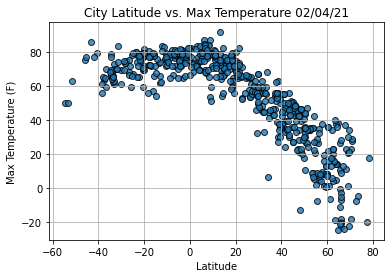

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

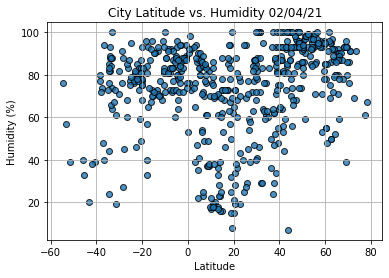

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()